In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import os

%pylab inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
from scipy.stats import binned_statistic

Populating the interactive namespace from numpy and matplotlib


In [2]:
dir_ = './Documents'
save_path = os.path.abspath(os.path.join(os.getcwd(), dir_, 'elections.pickle'))

In [3]:
with open(save_path, 'rb') as handle:
    data_dict = pickle.load(handle)

In [4]:
data = pd.concat(map(pd.DataFrame, data_dict.itervalues()), keys=data_dict.keys()).stack().unstack(1)
data = data.reset_index()
cols =  list(data.columns)
cols[0] = 'region_'
cols[1] = 'uik'
data.columns = cols
data['region'] = data.region_.apply(lambda x: x.split('-')[0].strip())

In [54]:
for col in data.columns:
    if col not in ['region_', 'uik', 'region']:
        data[col] = data[col].apply(lambda x: int(x)) 

In [55]:
data['visitors'] = data.papers_notvalid+data.valid_papers
data['appearance'] = 1.0*(data.papers_notvalid+data.valid_papers)/data.voters
data['appearance_adj'] = 1.0*(data.papers_notvalid+data.valid_papers-data.voters_dist)/data.voters
data['rate_dist'] = 1.0*data.voters_dist/data.valid_papers
data['flag1'] = data.apply(lambda row: 1.0*(max(row['papers_before'],row['papers_temp_box']) 
                                            + row['voters_dist'])/row['valid_papers'] if row['valid_papers'] > 0 else 0., axis = 1)
data['notvalid'] = 1.0*data.papers_notvalid/data.valid_papers

In [223]:
data['er_share'] = 1.0*data.zhuliki/data.valid_papers

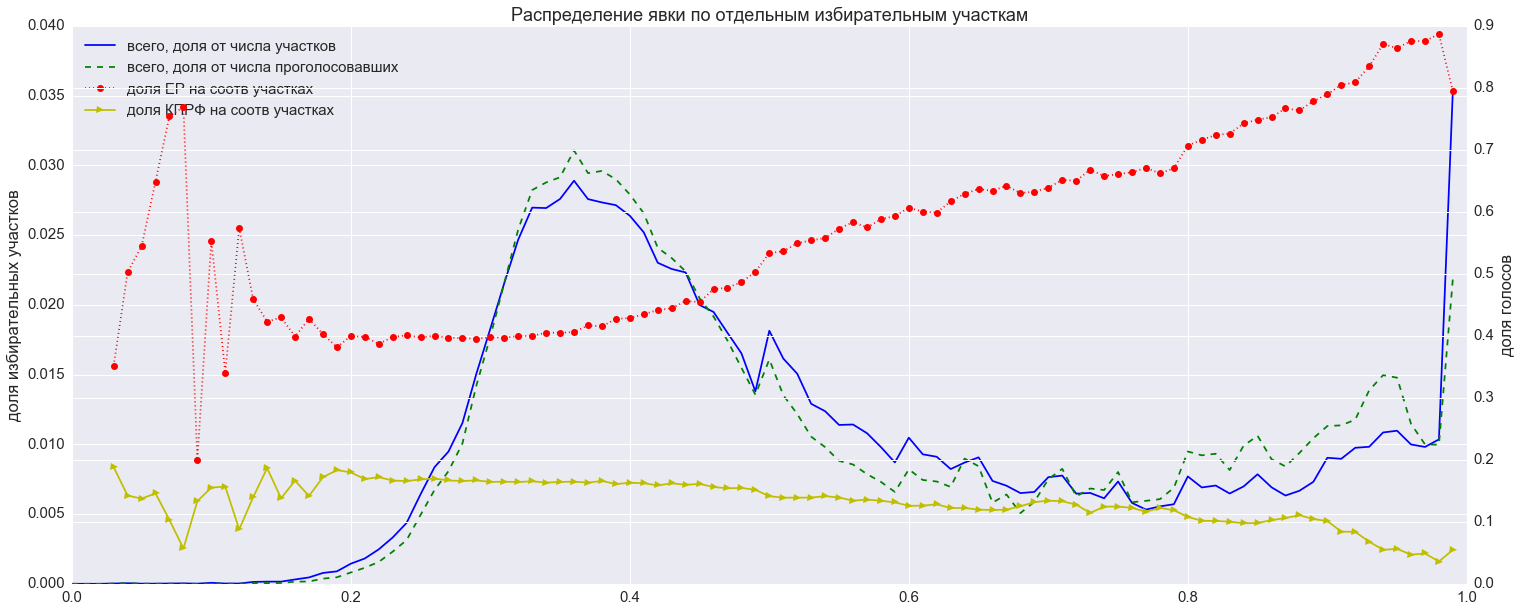

In [181]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

step = 0.01
width = step/3

bins = np.arange(0, 1. + step, step)
hist_data, _ = np.histogram(data.appearance, bins)
hist_data = 1.0*hist_data/hist_data.sum()
hist_data_adj, _, _ = binned_statistic(data.appearance, data.valid_papers, bins=bins, statistic = 'sum')
er, _, _ = binned_statistic(data.appearance, data.zhuliki, bins=bins, statistic = 'sum')
er = er/hist_data_adj
kprf, _, _ = binned_statistic(data.appearance, data.kprf, bins=bins, statistic = 'sum')
kprf = kprf/hist_data_adj
hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()

lines = []
l1, = ax.plot(bins[:-1], hist_data, 'b', label = u'всего, доля от числа участков')
lines.append(l1)
l2, = ax.plot(bins[:-1], hist_data_adj, 'g--', label = u'всего, доля от числа проголосовавших')
lines.append(l2)
l3, = ax2.plot(bins[:-1], er, 'r:o', label = u'доля ЕР на соотв участках')
lines.append(l3)
l4, = ax2.plot(bins[:-1], kprf, 'y->', label = u'доля КПРФ на соотв участках')
lines.append(l4)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_ylabel(u'доля избирательных участков')
ax2.set_ylabel(u'доля голосов')
ax.set_title(u'Распределение явки по отдельным избирательным участкам')

plt.show()

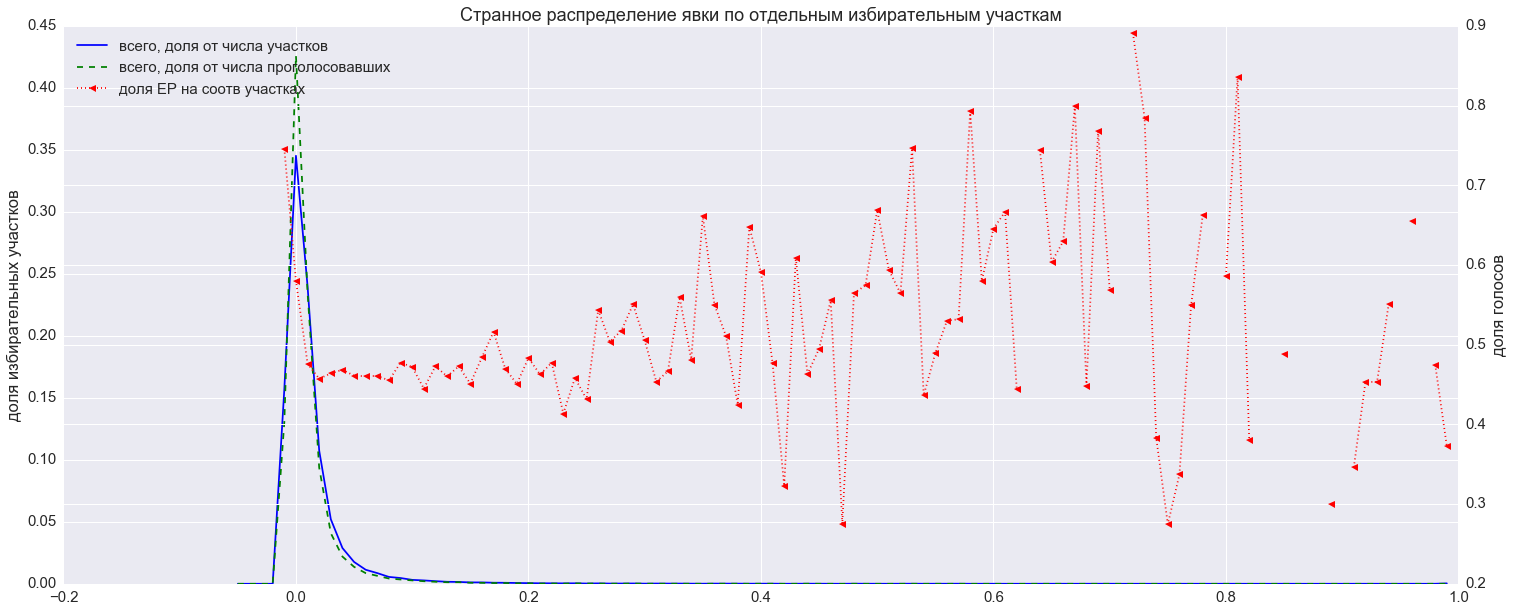

In [226]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

step = 0.01
width = step/3

bins = np.arange(-0.05, 1. + step, step)
hist_data, _ = np.histogram(data.rate_dist, bins)
hist_data = 1.0*hist_data/hist_data.sum()
hist_data_adj, _, _ = binned_statistic(data.rate_dist, data.valid_papers, bins=bins, statistic = 'sum')
er, _, _ = binned_statistic(data.rate_dist, data.zhuliki, bins=bins, statistic = 'sum')
er = er/hist_data_adj
hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()

lines = []
l1, = ax.plot(bins[:-1], hist_data, 'b', label = u'всего, доля от числа участков')
lines.append(l1)
l2, = ax.plot(bins[:-1], hist_data_adj, 'g--', label = u'всего, доля от числа проголосовавших')
lines.append(l2)
l3, = ax2.plot(bins[:-1], er, 'r:<', label = u'доля ЕР на соотв участках')
lines.append(l3)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_ylabel(u'доля избирательных участков')
ax2.set_ylabel(u'доля голосов')
ax.set_title(u'Странное распределение явки по отдельным избирательным участкам')

plt.show()


In [182]:
print data.shape

(96418, 41)


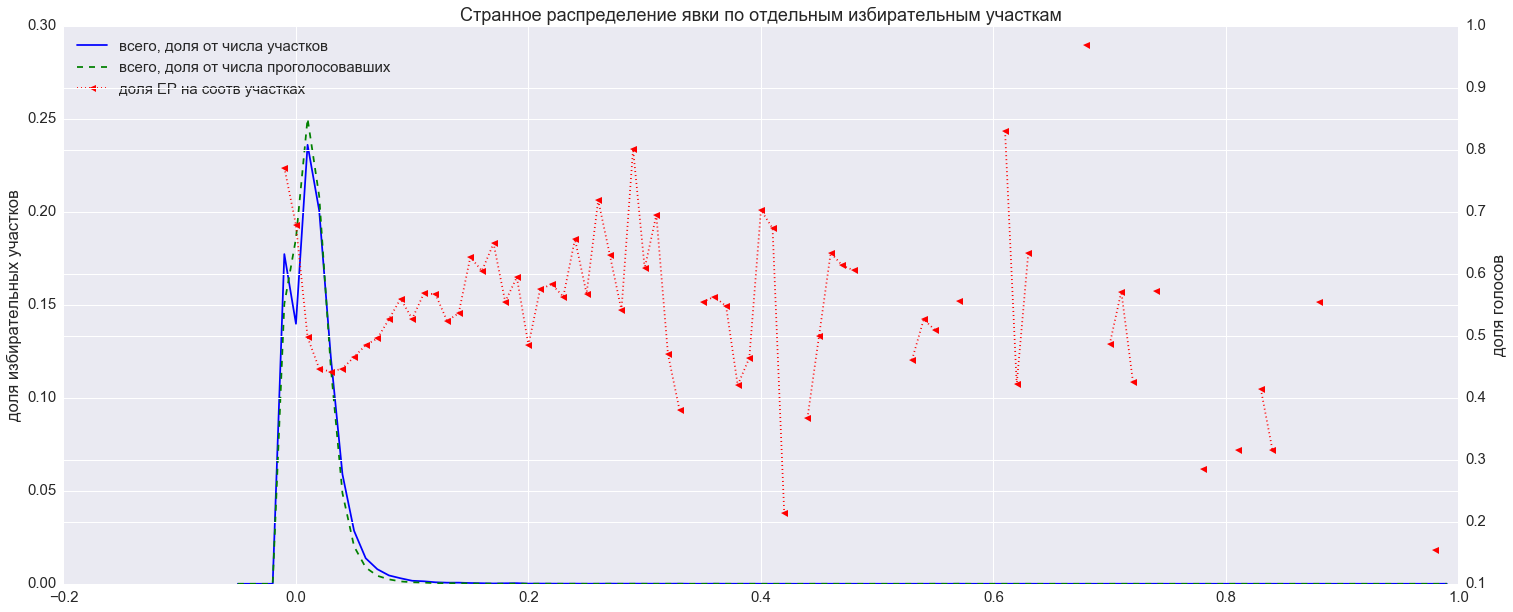

In [164]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

step = 0.01
width = step/3

bins = np.arange(-0.05, 1. + step, step)
hist_data, _ = np.histogram(data.notvalid, bins)
hist_data = 1.0*hist_data/hist_data.sum()
hist_data_adj, _, _ = binned_statistic(data.notvalid, data.valid_papers, bins=bins, statistic = 'sum')
er, _, _ = binned_statistic(data.notvalid, data.zhuliki, bins=bins, statistic = 'sum')
er = er/hist_data_adj
hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()

lines = []
l1, = ax.plot(bins[:-1], hist_data, 'b', label = u'всего, доля от числа участков')
lines.append(l1)
l2, = ax.plot(bins[:-1], hist_data_adj, 'g--', label = u'всего, доля от числа проголосовавших')
lines.append(l2)
l3, = ax2.plot(bins[:-1], er, 'r:<', label = u'доля ЕР на соотв участках')
lines.append(l3)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_ylabel(u'доля избирательных участков')
ax2.set_ylabel(u'доля голосов')
ax.set_title(u'Странное распределение явки по отдельным избирательным участкам')

plt.show()

In [ ]:
print data[(data.flag1 > 0.1) & (data.appearance < 0.6)].region_.count()

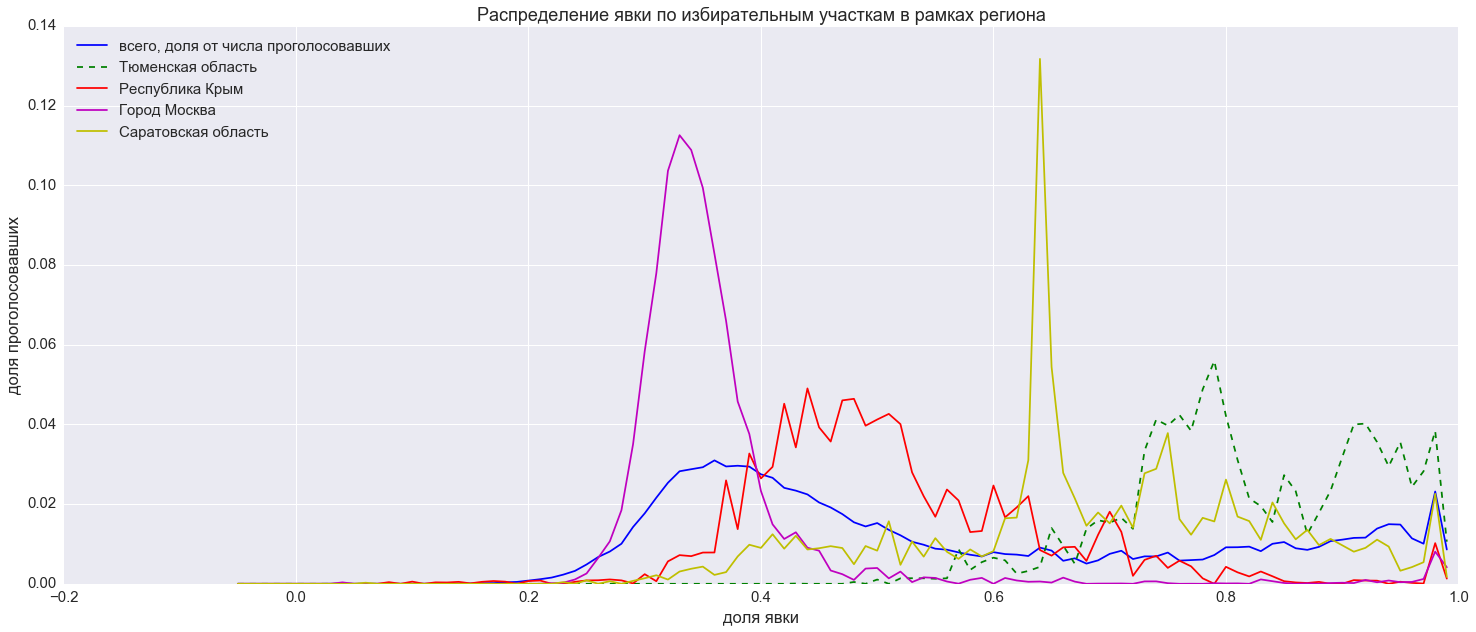

In [188]:
regions = [u'Тюменская область', u'Республика Крым', u'Город Москва', u'Саратовская область']
styles = ['g--', 'r', 'm', 'y-']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)

step = 0.01
width = step/3

bins = np.arange(-0.05, 1. + step, step)
hist_data_adj, _, _ = binned_statistic(data.appearance, data.valid_papers, bins=bins, statistic = 'sum')
hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()
lines = []
l1, = ax.plot(bins[:-1], hist_data_adj, 'b', label = u'всего, доля от числа проголосовавших')
lines.append(l1)

for reg, st in zip(regions, styles):
    hist_data_adj, _, _ = binned_statistic(data[data.region == reg].appearance, 
                                           data[data.region == reg].valid_papers, bins=bins, statistic = 'sum')
    hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()
    l, = ax.plot(bins[:-1], hist_data_adj, st, label = reg)
    lines.append(l)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_title(u'Распределение явки по избирательным участкам в рамках региона')
ax.set_xlabel(u'доля явки')
ax.set_ylabel(u'доля проголосовавших')

plt.show()


In [ ]:
regions = [u'Карачаево', u'Кабардино', u'Республика Тыва', u'Республика Дагестан', u'Кемеровская область']
styles = ['b', 'r', 'g--', 'm:', 'y-']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)

step = 0.01
width = step/3

bins = np.arange(-0.05, 1. + step, step)
lines = []

for reg, st in zip(regions, styles):
    hist_data_adj, _, _ = binned_statistic(data[data.region == reg].appearance, 
                                           data[data.region == reg].valid_papers, bins=bins, statistic = 'sum')
    hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()
    l, = ax.plot(bins[:-1], hist_data_adj, st, label = reg)
    lines.append(l)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_title(u'Распределение явки по избирательным участкам в рамках региона')
ax.set_xlabel(u'доля явки')
ax.set_ylabel(u'доля проголосовавших')

plt.show()


In [198]:
data_regions_dict = {}
for r in data.region.unique():
    data_regions_dict[r] = {}
    data_regions_dict[r]['appearance'] = 1.0*(data[data.region == r].papers_notvalid.sum()+data[data.region == r].valid_papers.sum())/data[data.region == r].voters.sum()
    data_regions_dict[r]['voters'] = 1.0*data[data.region == r].voters.sum()
    data_regions_dict[r]['er'] = 1.0*(data[data.region == r].zhuliki.sum())/data[data.region == r].valid_papers.sum()
    data_regions_dict[r]['appearance_median'] = data[data.region == r].appearance.median()
data_regions= pd.DataFrame(data_regions_dict).stack().unstack(0)

In [248]:
print data_regions.sort_values(by = ['appearance'], ascending = False).head(10)

                            appearance  appearance_median        er   voters
Чеченская Республика          0.949216           0.948014  0.963287   695573
Карачаево                     0.933164           0.934722  0.818441   306375
Кабардино                     0.901100           0.905023  0.777204   536867
Республика Тыва               0.898478           0.981959  0.835184   156783
Республика Дагестан           0.880544           0.920736  0.893767  1653807
Кемеровская область           0.867105           0.904762  0.776853  2032985
Республика Северная Осетия    0.855939           0.867801  0.674263   528993
Республика Мордовия           0.830426           0.939013  0.847777   628216
Республика Ингушетия          0.814218           0.822720  0.726464   219176
Тюменская область             0.811063           0.898345  0.587456  1080797


In [ ]:
results_alternative[p]['share'] = 1.*data[(data.flag1 <= threshold1) & 
                                     (data.appearance) <= threshold][p].sum()/data[(data.flag1 <= threshold1) & 
                                                                                   (data.appearance) <= threshold].valid_papers.sum()

In [247]:
threshold = 0.5
threshold1 = 0.15
threshold2 = 0.5
results_alternative = {}
participants = ['rodina', 'comros', 'renters', 'zhuliki', 'green', 'gr_platf', 'ldpr',
                'parnas', 'rost', 'sila', 'apple', 'kprf', 'patriots', 'spavros']
for p in participants:
    results_alternative[p] = {}
    results_alternative[p]['share'] = 1.*data[(data.flag1 <= threshold1) & 
                                              (data.appearance <= threshold) &
                                             (data.er_share <= threshold2)][p].sum()/data[(data.flag1 <= threshold1) & 
                                                                                   (data.appearance <= threshold) & ((data.er_share <= threshold2))].valid_papers.sum()
results_alternative = pd.DataFrame(results_alternative).stack().unstack(0)
print results_alternative.sort_values(by = ['share'], ascending = False).head(5)

            share
zhuliki  0.382802
ldpr     0.177975
kprf     0.172292
spavros  0.091719
apple    0.037572


In [165]:
results = {}
for p in participants:
    results[p] = {}
    results[p]['share'] = 1.*data[p].sum()/data.valid_papers.sum()
results = pd.DataFrame(results).stack().unstack(0)

In [173]:
liberals = ['rodina', 'parnas', 'apple', 'spavros', 'green', 'gr_platf', 'rost']
votes = 0
for p in liberals:
    votes += data[(data.flag1 <= threshold1) & (data.appearance <= threshold)][p].sum()
print 1.*votes / data[(data.flag1 <= threshold1) & (data.appearance <= threshold)].valid_papers.sum()

0.174161714718


In [261]:
votes = 0
print results[results.index.isin(liberals)].share.sum()
print results_alternative[results_alternative.index.isin(liberals)].share.sum()

0.129424736716
0.202888779085


In [259]:
print results.index

Index([u'apple', u'comros', u'gr_platf', u'green', u'kprf', u'ldpr', u'parnas',
       u'patriots', u'renters', u'rodina', u'rost', u'sila', u'spavros',
       u'zhuliki'],
      dtype='object')


In [168]:
print results_alternative.sort_values(by = ['share'], ascending = False).head(10)

            share
zhuliki  0.438505
ldpr     0.167527
kprf     0.160224
spavros  0.080000
apple    0.030381
comros   0.027206
renters  0.023761
rodina   0.020766
rost     0.019190
parnas   0.010766


In [167]:
print results.sort_values(by = ['share'], ascending = False).head(10)

            share
zhuliki  0.552595
kprf     0.135986
ldpr     0.133844
spavros  0.063360
comros   0.023088
apple    0.020275
renters  0.017627
rodina   0.015291
rost     0.013130
green    0.007711


In [258]:
threshold = 0.6
threshold1 = 0.2
print '''
    Заявленная доля ЕР: {0:.2%}
    Явка в топ-10 регионах {1:.2%}, доля проголосовавших избирателей {2:.2%}, доля ЕР {3:.2%}, жителей {7}, за ЕР {8}
    Явка в остальных регионах {4:.2%}, доля проголосовавших избирателей {5:.2%}, доля ЕР {6:.2%}, жителей {9}, за ЕР {10}
'''.format(
    1.*data.zhuliki.sum()/data.valid_papers.sum(),
    1.*(data[data.region.isin(regions_fraud)].valid_papers.sum()
       +data[data.region.isin(regions_fraud)].papers_notvalid.sum())/data[data.region.isin(regions_fraud)].voters.sum(),
    1.*data[data.region.isin(regions_fraud)].valid_papers.sum()/data.valid_papers.sum(),
    1.*data[data.region.isin(regions_fraud)].zhuliki.sum()/data[data.region.isin(regions_fraud)].valid_papers.sum(),
    1.*(data[~data.region.isin(regions_fraud)].valid_papers.sum()
       +data[~data.region.isin(regions_fraud)].papers_notvalid.sum())/data[~data.region.isin(regions_fraud)].voters.sum(),
    1.*data[~data.region.isin(regions_fraud)].valid_papers.sum()/data.valid_papers.sum(),
    1.*data[~data.region.isin(regions_fraud)].zhuliki.sum()/data[~data.region.isin(regions_fraud)].valid_papers.sum(),
    data[data.region.isin(regions_fraud)].voters.sum(),
    data[data.region.isin(regions_fraud)].zhuliki.sum(),
    data[~data.region.isin(regions_fraud)].voters.sum(),
    data[~data.region.isin(regions_fraud)].zhuliki.sum()
)


    Заявленная доля ЕР: 55.26%
    Явка в топ-10 регионах 86.99%, доля проголосовавших избирателей 13.21%, доля ЕР 79.59%, жителей 7839572, за ЕР 5404002
    Явка в остальных регионах 44.78%, доля проголосовавших избирателей 86.79%, доля ЕР 51.56%, жителей 101754422, за ЕР 23004561



In [249]:
regions_fraud = [u'Чеченская Республика',
                 u'Кабардино',
                 u'Республика Тыва',
                 u'Карачаево',
                 u'Республика Дагестан',
                 u'Кемеровская область',
                 u'Республика Северная Осетия',
                 u'Республика Мордовия',
                u'Республика Ингушетия',
                u'Тюменская область']

In [112]:
def test_reg(reg, alpha):
    n_array = np.array(data[data.region == reg].voters)
    print n_array
    success_array = np.array(data[data.region == reg].visitors)
    print success_array
    #p = np.median(data[data.region == reg].appearance)
    #p = 1.*data[data.region == reg].visitors.sum()/data[data.region == reg].voters.sum()
    p = 0.3
    print p
    p1 = get_prob(n_array, success_array, p, 0.9)
    print p1
    lots = len(n_array)
    print lots
    p_low, p_high = binom.interval(0.9, lots, alpha)
    p_low = p_low / lots
    p_high = p_high / lots
    print p_low, p_high

In [91]:
from scipy.stats import binom
from math import sqrt

In [111]:
def get_prob(n_array, s_array, prob, alpha):
    false_pos = 0
    for n, s in zip(n_array, s_array):
        min_bin, max_bin = binom.interval(alpha, n, prob)
        if min_bin >= s or max_bin <= s:
            false_pos += 1
        #print s, n, min_bin, max_bin
    return 1.*false_pos/len(n_array)

In [215]:
reg_exp = u'Город Москва'
p_ = 0.35
exp_appearance = []
exp_voters = []
for v in data[data.region == reg_exp]['voters']:
    exp_appearance.append(1.*int(np.random.binomial(v, p_, 1000).mean())/v)
    exp_voters.append(1.*int(np.random.binomial(v, p_, 1000).mean()))

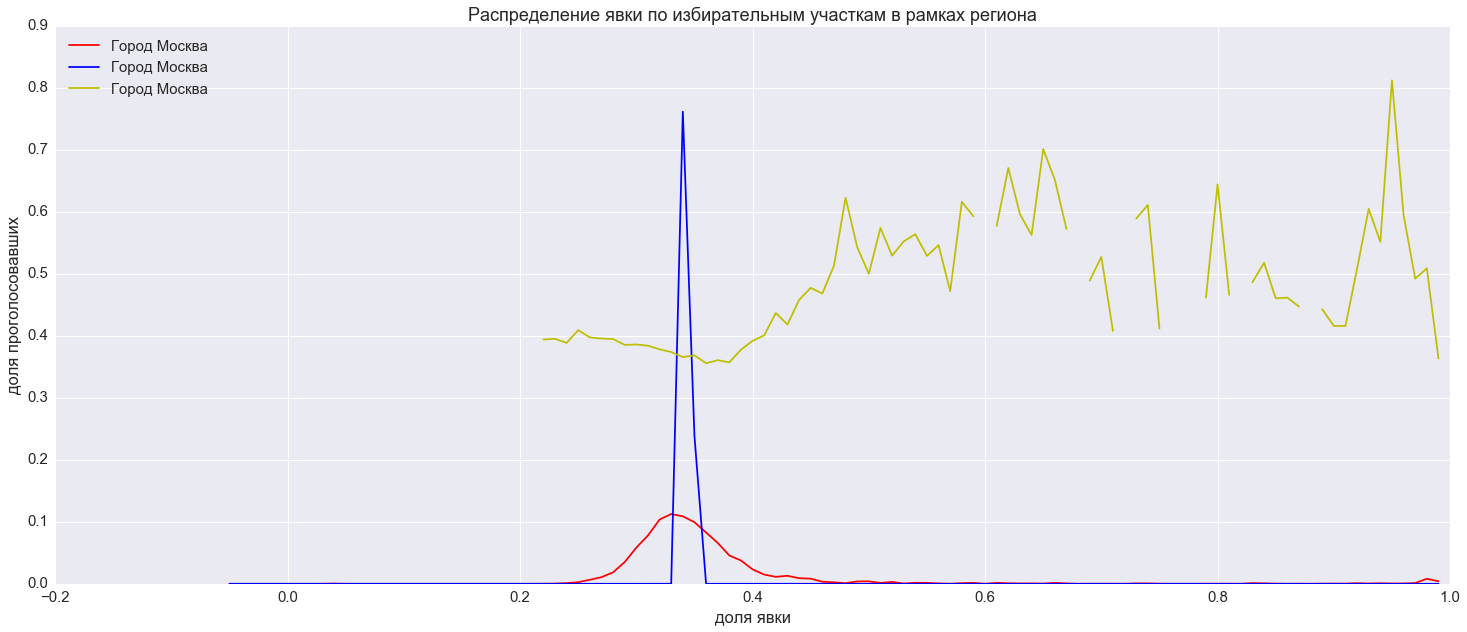

In [222]:
reg = u'Город Москва'
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)

step = 0.01
width = step/3

bins = np.arange(-0.05, 1. + step, step)
hist_data_adj, _, _ = binned_statistic(data[data.region == reg].appearance, 
                                           data[data.region == reg].valid_papers, bins=bins, statistic = 'sum')
er, _, _ = binned_statistic(data[data.region == reg].appearance, data[data.region == reg].zhuliki, bins=bins, statistic = 'sum')
er = er/hist_data_adj

hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()

hist_data_exp, _, _ = binned_statistic(exp_appearance, exp_voters, bins=bins, statistic = 'sum')
hist_data_exp = 1.0*hist_data_exp/hist_data_exp.sum()

lines = []

hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()
l1, = ax.plot(bins[:-1], hist_data_adj, 'r', label = reg)
lines.append(l1)
l2, = ax.plot(bins[:-1], hist_data_exp, 'b', label = reg)
lines.append(l2)
l3, = ax.plot(bins[:-1], er, 'y', label = reg)
lines.append(l3)




ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_title(u'Распределение явки по избирательным участкам в рамках региона')
ax.set_xlabel(u'доля явки')
ax.set_ylabel(u'доля проголосовавших')

plt.show()


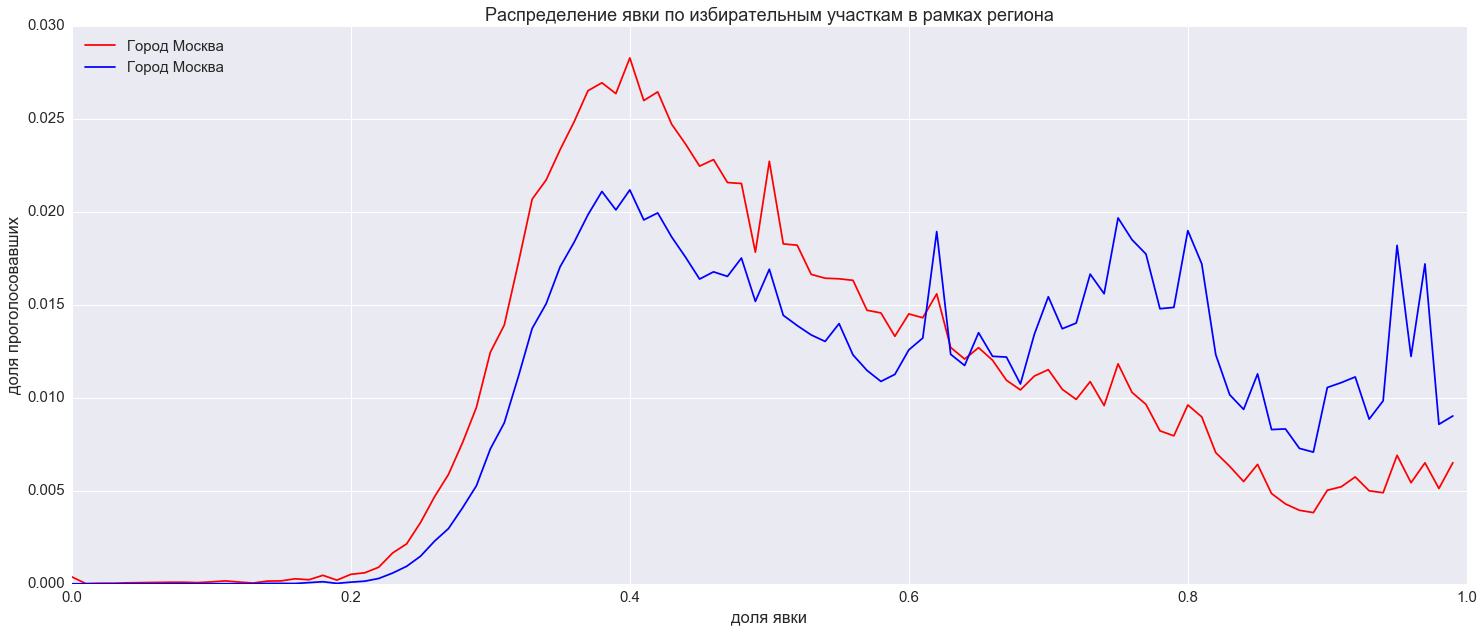

In [225]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)

step = 0.01
width = step/3

bins = np.arange(0, 1. + step, step)
hist_data, _ = np.histogram(data.er_share, bins)
hist_data = 1.0*hist_data/hist_data.sum()
hist_data_adj, _, _ = binned_statistic(data.er_share, 
                                           data.zhuliki, bins=bins, statistic = 'sum')
hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()

lines = []

hist_data_adj = 1.0*hist_data_adj/hist_data_adj.sum()
l1, = ax.plot(bins[:-1], hist_data, 'r', label = reg)
lines.append(l1)
l2, = ax.plot(bins[:-1], hist_data_adj, 'b', label = reg)
lines.append(l2)

ax.legend(lines, [l.get_label() for l in lines], loc='upper left') #center center
ax.set_title(u'Распределение явки по избирательным участкам в рамках региона')
ax.set_xlabel(u'доля явки')
ax.set_ylabel(u'доля проголосовавших')

plt.show()


In [229]:
for i in data.er_share.head():
    print i, round(i,2)

0.551066217733 0.55
0.551359516616 0.55
0.550847457627 0.55
0.407322654462 0.41
0.630573248408 0.63


In [235]:
print 1.0*data[(data.er_share >= 0.395) & (data.er_share <= 0.405)].voters.count()/data.voters.count()
print 1.0*data[(data.er_share >= 0.445) & (data.er_share <= 0.455)].voters.count()/data.voters.count()
print 1.0*data[(data.er_share >= 0.495) & (data.er_share <= 0.505)].voters.count()/data.voters.count()
print 1.0*data[(data.er_share >= 0.595) & (data.er_share <= 0.605)].voters.count()/data.voters.count()

0.0270592627933
0.0226721151652
0.0208156153415
0.0142815656828
